In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [30]:
nipa = pd.read_csv('download.csv', skiprows=4, index_col=0, header = [0,1])

In [632]:
gdp = nipa.copy()
gdp.columns = gdp.columns.map(''.join).str.strip('')



In [633]:
rename = {'Q1': '', 'Q2': '.25', 'Q3': '.5', 'Q4': '.75'}
gdp = gdp.rename(columns=lambda x : x.replace('Q1', ''))
gdp = gdp.rename(columns=lambda x : x.replace('Q2', '.25'))
gdp = gdp.rename(columns=lambda x : x.replace('Q3', '.5'))
gdp = gdp.rename(columns=lambda x : x.replace('Q4', '.75'))

In [634]:
gdp = gdp.transpose()
gdp = gdp.rename(columns=gdp.iloc[0]).drop(gdp.index[0])

In [635]:
gdp

,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,Gross national product
1959,16.336,16.055,26.335,56.963,17.792,11.342,24.417,23.285,29.987,8.768,...,16.529,17.173,14.627,10.982,13.581,13.059,14.575,9.125,NaN,16.303
1959.25,16.361,16.120,26.367,57.179,17.796,11.427,24.348,23.385,30.175,8.817,...,16.608,17.328,14.588,10.971,13.557,13.053,14.461,9.128,NaN,16.329
1959.5,16.424,16.218,26.449,57.169,17.873,11.536,24.347,23.458,30.323,8.851,...,16.687,17.459,14.586,10.966,13.551,13.080,14.283,9.123,NaN,16.392
1959.75,16.489,16.306,26.519,57.145,17.939,11.638,24.403,23.501,30.395,8.859,...,16.849,17.693,14.612,10.975,13.560,13.093,14.268,9.132,NaN,16.456
1960,16.555,16.328,26.482,57.062,17.914,11.691,24.724,23.534,30.413,8.890,...,16.801,17.640,14.567,11.009,13.545,13.075,14.256,9.222,NaN,16.523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.25,112.859,110.491,93.230,84.783,97.712,119.709,109.134,110.694,104.867,120.620,...,86.349,82.180,108.574,114.253,111.443,109.298,114.765,116.093,NaN,112.846
2020.5,113.888,111.490,94.345,86.344,98.544,120.620,110.022,111.307,104.899,120.931,...,88.008,83.900,109.755,114.922,112.267,110.259,115.398,116.659,NaN,113.873
2020.75,114.439,111.910,94.418,86.386,98.636,121.263,110.143,111.840,105.009,121.086,...,88.489,84.261,111.061,115.769,112.957,110.933,116.111,117.612,NaN,114.432
2021,115.652,112.970,95.771,86.879,100.547,122.105,110.919,112.855,105.207,122.253,...,91.286,87.241,112.329,117.294,114.063,112.146,117.063,119.417,NaN,115.632


In [636]:

gdp_def = gdp[['        Gross domestic product']]
gdp_def = gdp_def.rename(columns={'        Gross domestic product': 'GDP'})

In [637]:
gdp_def['GDP']=gdp_def['GDP'].astype(float)

In [638]:
gdp_def['Rate']=gdp_def['GDP'].pct_change(periods=4)

In [639]:
gdp_def['Rate'] = gdp_def['Rate'].apply(lambda a:a * 100)

In [142]:
gdp_def = gdp_def.drop(columns=['date'])

In [145]:
gdp_def = gdp_def.set_index(pd.DatetimeIndex(gdp_def['date']))

In [640]:
gdp_def = gdp_def.iloc[4: , :]

In [646]:
gdp_def

,GDP,Rate
1960,16.555,1.340597
1960.25,16.597,1.442455
1960.5,16.654,1.400390
1960.75,16.703,1.297835
1961,16.739,1.111447
...,...,...
2020.25,112.859,0.630394
2020.5,113.888,1.218483
2020.75,114.439,1.293172
2021,115.652,2.034478


In [148]:
goog = gdp_def['Rate']

In [545]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
#color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
#              CB91_Purple, CB91_Violet]
color_list = ['#e3abe8','#E8ABB0', '#ABE8E3']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


In [379]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sns.set(font='Helvetica',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': '#DDEAE3',
 'axes.grid': True,
 #'axes.gridcolor': 'CB91_Green',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.bottom': False,
 'axes.spines.left': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': True,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'inout',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":12,
                                "axes.titlesize":12,
                                "axes.labelsize":12})

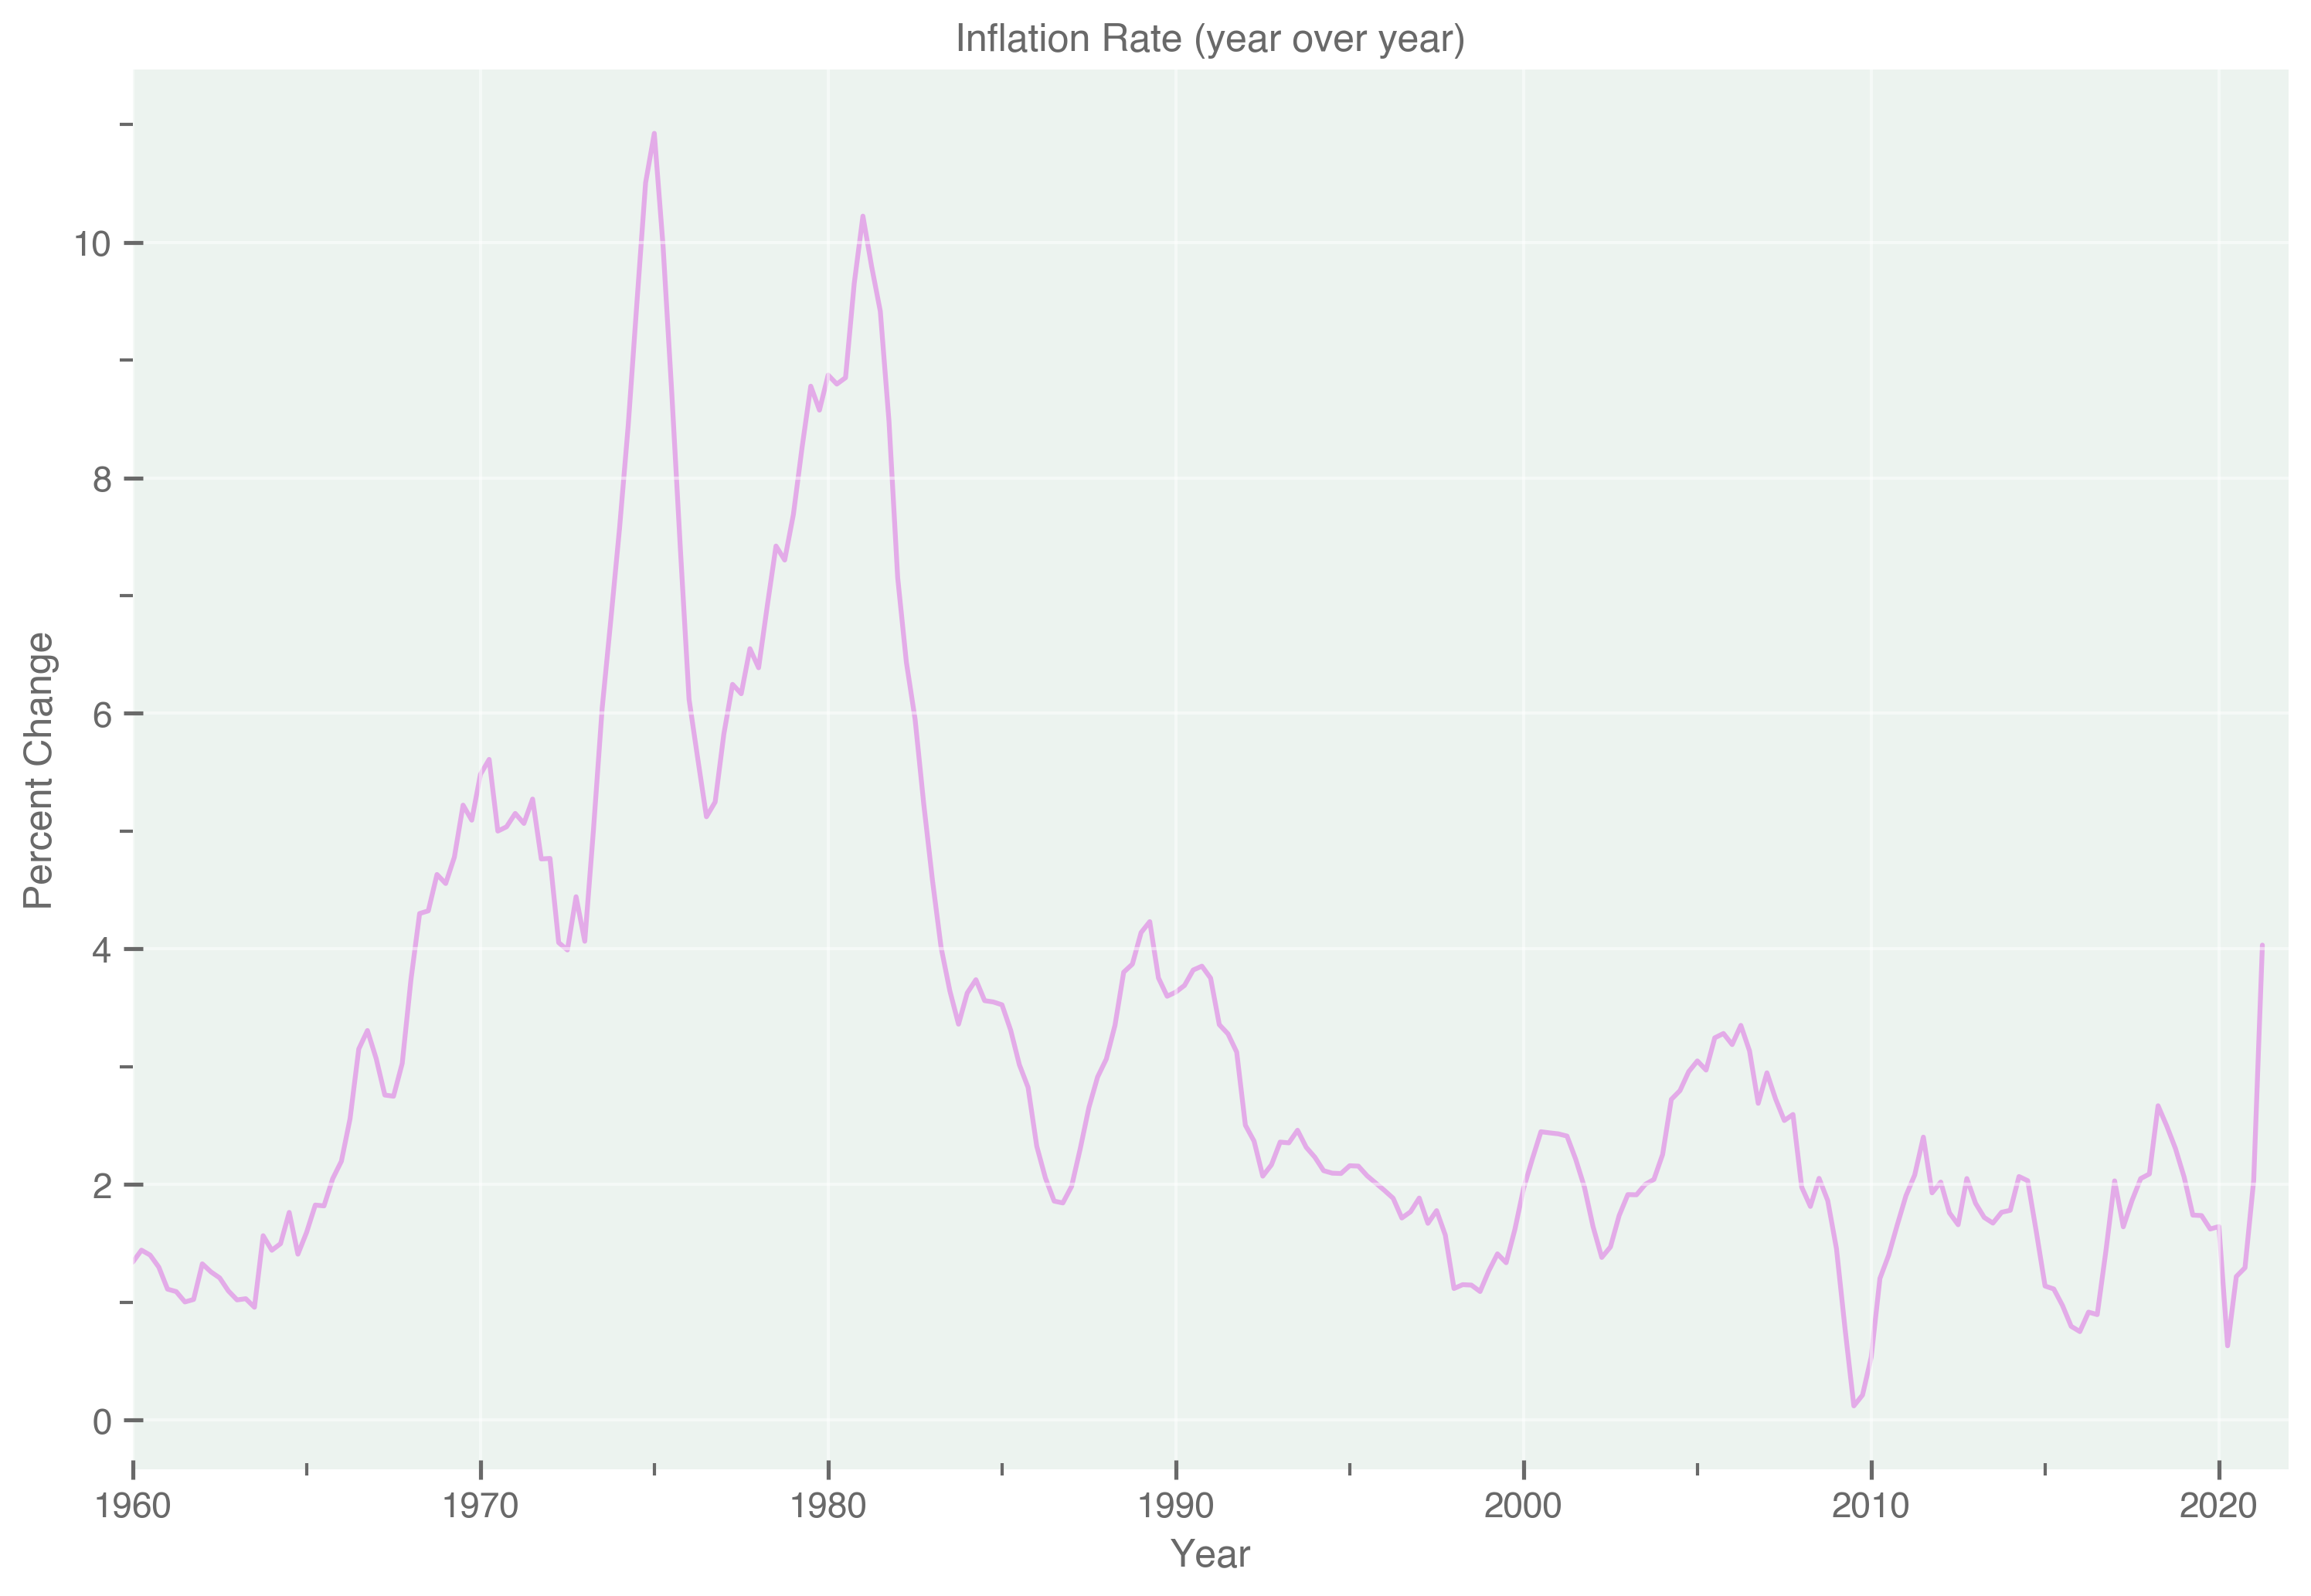

In [651]:
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.patch.set_alpha(.55)
ax.plot(gdp_def['Rate'], color='#e3abe8', alpha=1)
#ax.axvspan(1990, 2000, color=CB91_Violet, alpha=0.25)
#ax.set_xticks(ax.get_xticks()[::65])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlim(1960, 2022)
#ax.set_ylim(0)
ax.set(title='Inflation Rate (year over year)',
ylabel='Percent Change',
xlabel='Year')
plt.show()

In [647]:
gdp_def.index = gdp_def.index.astype('float64')

In [552]:
nipa_gdp = pd.read_csv('gdp.csv', skiprows=4, index_col=0, header = [0,1])

In [553]:
ngdp = nipa_gdp.copy()
ngdp.columns = ngdp.columns.map(''.join).str.strip('')
ngdp = ngdp.rename(columns=lambda x : x.replace('Q1', ''))
ngdp = ngdp.rename(columns=lambda x : x.replace('Q2', '.25'))
ngdp = ngdp.rename(columns=lambda x : x.replace('Q3', '.5'))
ngdp = ngdp.rename(columns=lambda x : x.replace('Q4', '.75'))
ngdp = ngdp.transpose()
ngdp = ngdp.rename(columns=ngdp.iloc[0]).drop(ngdp.index[0])

In [463]:
ngdp

,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local
1959,510.3,309.4,169.7,43.6,126.1,139.7,83.2,79.3,50.9,17.4,...,15.6,6.4,21.4,14.5,6.9,117.2,72.4,61.1,11.2,44.8
1959.25,522.7,315.5,172.6,45.5,127.2,142.9,89.4,82.1,52.7,18.0,...,15.9,5.9,22.5,15.5,7.0,118.5,73.6,60.3,13.3,45.0
1959.5,525.0,320.7,174.5,46.3,128.2,146.2,83.6,83.2,54.4,18.6,...,17.5,6.6,22.9,15.8,7.1,119.5,74.5,61.4,13.1,45.0
1959.75,528.6,322.8,173.6,44.1,129.5,149.3,86.5,82.4,54.4,18.5,...,16.9,6.3,22.5,15.4,7.1,118.6,73.8,61.0,12.9,44.8
1960,542.6,326.4,175.1,45.5,129.6,151.3,96.5,85.3,56.3,19.4,...,19.5,6.6,23.3,15.7,7.6,117.0,71.0,60.0,11.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.25,19477.4,12989.7,4349.9,1468.3,2881.7,8639.8,3167.0,3456.9,2659.1,585.9,...,1146.3,661.5,2346.7,1942.1,404.6,3859.6,1525.0,872.4,652.6,2334.6
2020.5,21138.6,14293.8,4867.2,1753.3,3113.9,9426.6,3708.8,3693.8,2776.6,563.5,...,1413.0,666.6,2805.3,2368.8,436.5,3861.7,1515.1,883.9,631.3,2346.5
2020.75,21477.6,14467.6,4867.3,1759.2,3108.1,9600.4,3923.2,3865.9,2862.7,552.3,...,1520.8,699.9,3019.1,2540.8,478.3,3885.3,1512.3,900.8,611.5,2373.0
2021,22038.2,15005.4,5245.0,1957.8,3287.2,9760.4,3928.0,4022.2,2956.7,565.0,...,1607.5,704.4,3184.5,2698.1,486.4,3977.3,1568.6,897.1,671.6,2408.7


In [572]:
nomgdp = ngdp[['        Gross domestic product']]
nomgdp = nomgdp.rename(columns={'        Gross domestic product': 'GDP'})
nomgdp['GDP']=nomgdp['GDP'].astype(float)
nomgdp.index = nomgdp.index.astype('float64')

In [515]:
nomgdp

,GDP
1959.00,510.3
1959.25,522.7
1959.50,525.0
1959.75,528.6
1960.00,542.6
...,...
2020.25,19477.4
2020.50,21138.6
2020.75,21477.6
2021.00,22038.2


In [573]:
nomgdp['Real GDP (2012 Dollars)'] = (nomgdp / (gdp_def/100))
nomgdp = nomgdp.rename(columns={'GDP': 'Nominal GDP'})


In [559]:
gdp_def

,GDP
1959.00,16.336
1959.25,16.361
1959.50,16.424
1959.75,16.489
1960.00,16.555
...,...
2020.25,112.859
2020.50,113.888
2020.75,114.439
2021.00,115.652


In [527]:
realgdp

,GDP,Real GDP
1959.00,83.362608,NaN
1959.25,85.518947,NaN
1959.50,86.226000,NaN
1959.75,87.160854,NaN
1960.00,89.827430,NaN
...,...,...
2020.25,21981.998866,NaN
2020.50,24074.328768,NaN
2020.75,24578.750664,NaN
2021.00,25487.619064,NaN


In [614]:
nomgdp

,Nominal GDP,Real GDP (2012 Dollars),Annualized Rate
1959.00,510.3,3123.775710,NaN
1959.25,522.7,3194.792494,9.408546
1959.50,525.0,3196.541646,0.219180
1959.75,528.6,3205.773546,1.160250
1960.00,542.6,3277.559650,9.262480
...,...,...,...
2020.25,19477.4,17258.171701,-31.237191
2020.50,21138.6,18560.866817,33.786988
2020.75,21477.6,18767.727785,4.533084
2021.00,22038.2,19055.615121,6.278424


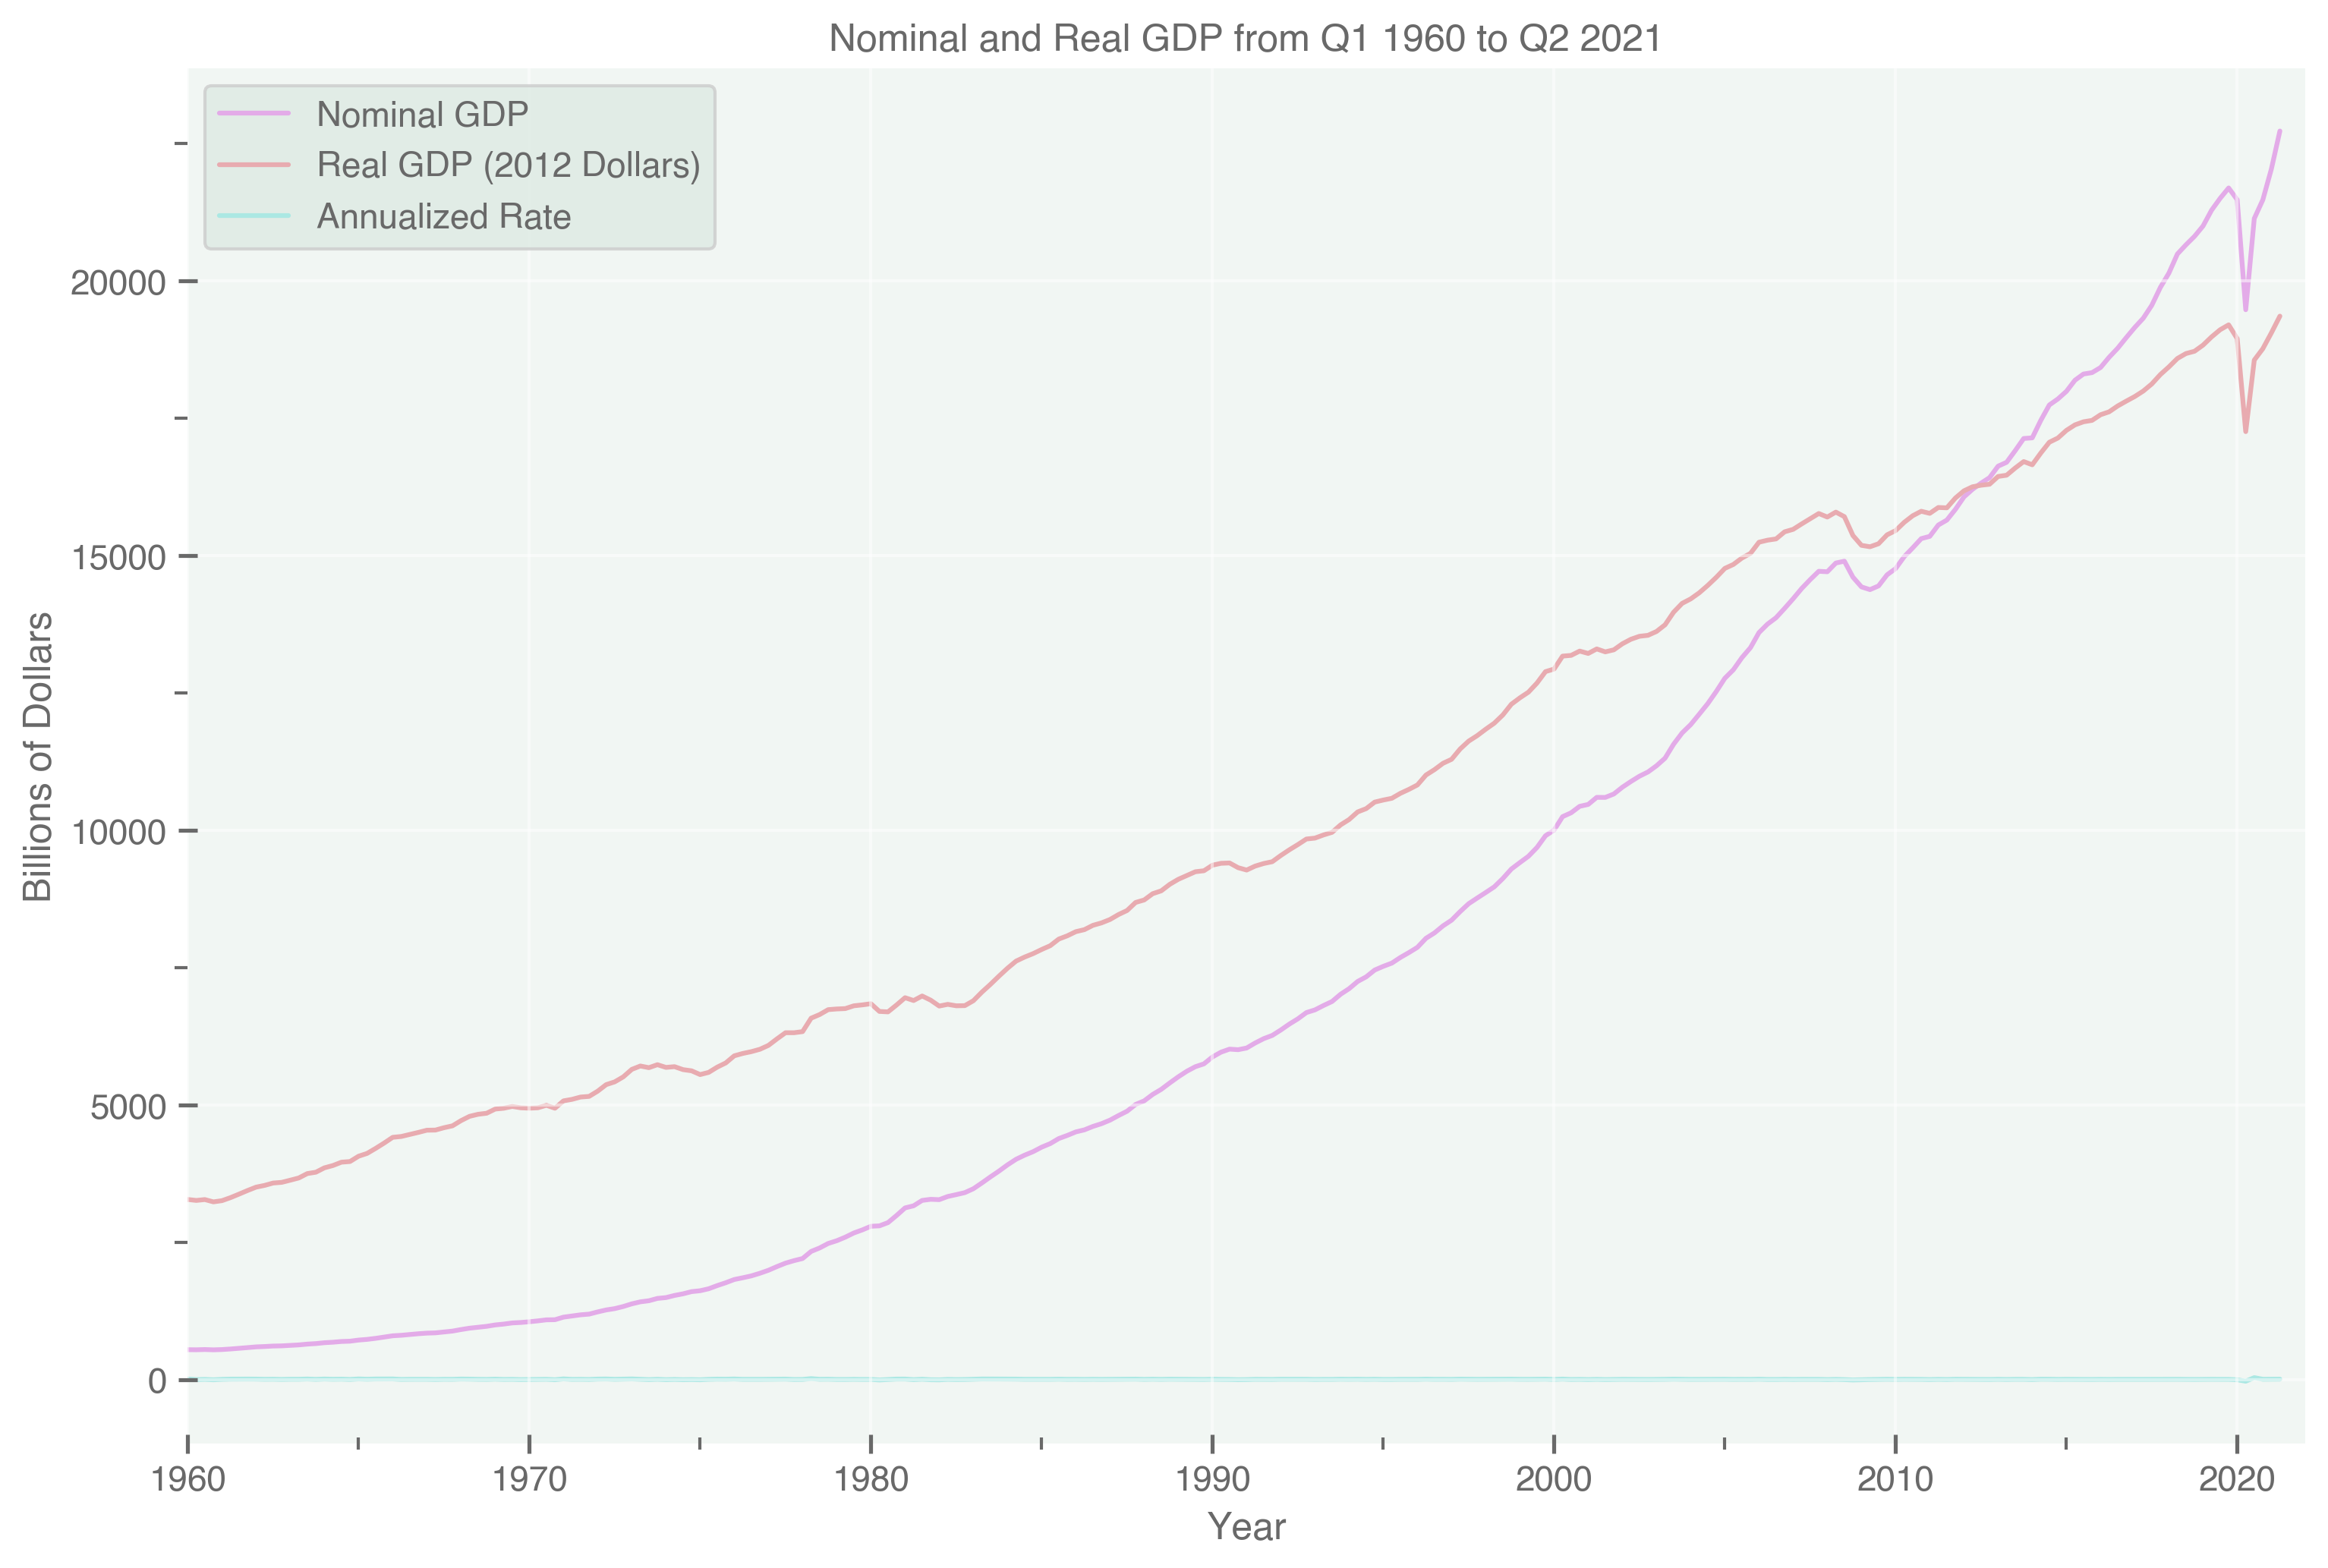

In [613]:
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.patch.set_alpha(.4)
ax.plot(nomgdp, alpha=1)
#ax.set_color_cycle(['#e3abe8', '#ABE8E3'])
#ax.cycler(color=['#e3abe8', '#ABE8E3'])
#ax2.plot(nomgdp['Real GDP'], color='#ABE8E3', alpha=1)
#ax.axvspan(2019.75, 2020.25, color='#EAE3DD', alpha=0.6)
#ax.axvspan(2019.75, 2020.25, color='#EAE3DD', alpha=0.6)
oof = 0
peaks = [2019.75, 2007.75, 2001.00, 1990.5, 1981.5, 1980.00, 1973.75, 1969.75, 1960.25]
ends = [2020.5, 2009.25, 2001.75, 1991.00, 1982.75, 1980.5, 1975.00, 1970.75, 1961.00]
while oof <= 8:
    #ax.axvspan(peaks[oof], ends[oof], color='#DDE7EA', alpha=0.5)
    oof += 1
    pass

#ax.set_xticks(ax.get_xticks()[::10])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(2500))
ax.set_xlim(1960, 2022)
#ax.set_ylim(0)
ax.set(title='Nominal and Real GDP from Q1 1960 to Q2 2021',
ylabel='Billions of Dollars',
xlabel='Year')
# twin1 = ax.twinx()
# twin1.plot(realgdp)
ax.legend(nomgdp.columns.values,loc='upper left', frameon=True)
plt.show()

In [591]:
#gdp_def['Rate']=gdp_def['GDP'].pct_change(periods=4)
nomgdp['Annualized Rate'] = nomgdp['Real GDP (2012 Dollars)'].pct_change(periods=1)

In [594]:
nomgdp

,Nominal GDP,Real GDP (2012 Dollars),Annualized Rate
1959.00,510.3,3123.775710,NaN
1959.25,522.7,3194.792494,9.408546
1959.50,525.0,3196.541646,0.219180
1959.75,528.6,3205.773546,1.160250
1960.00,542.6,3277.559650,9.262480
...,...,...,...
2020.25,19477.4,17258.171701,-31.237191
2020.50,21138.6,18560.866817,33.786988
2020.75,21477.6,18767.727785,4.533084
2021.00,22038.2,19055.615121,6.278424


In [593]:
nomgdp['Annualized Rate'] = nomgdp['Annualized Rate'].apply(lambda a: ((((a+1)**4)-1)*100))

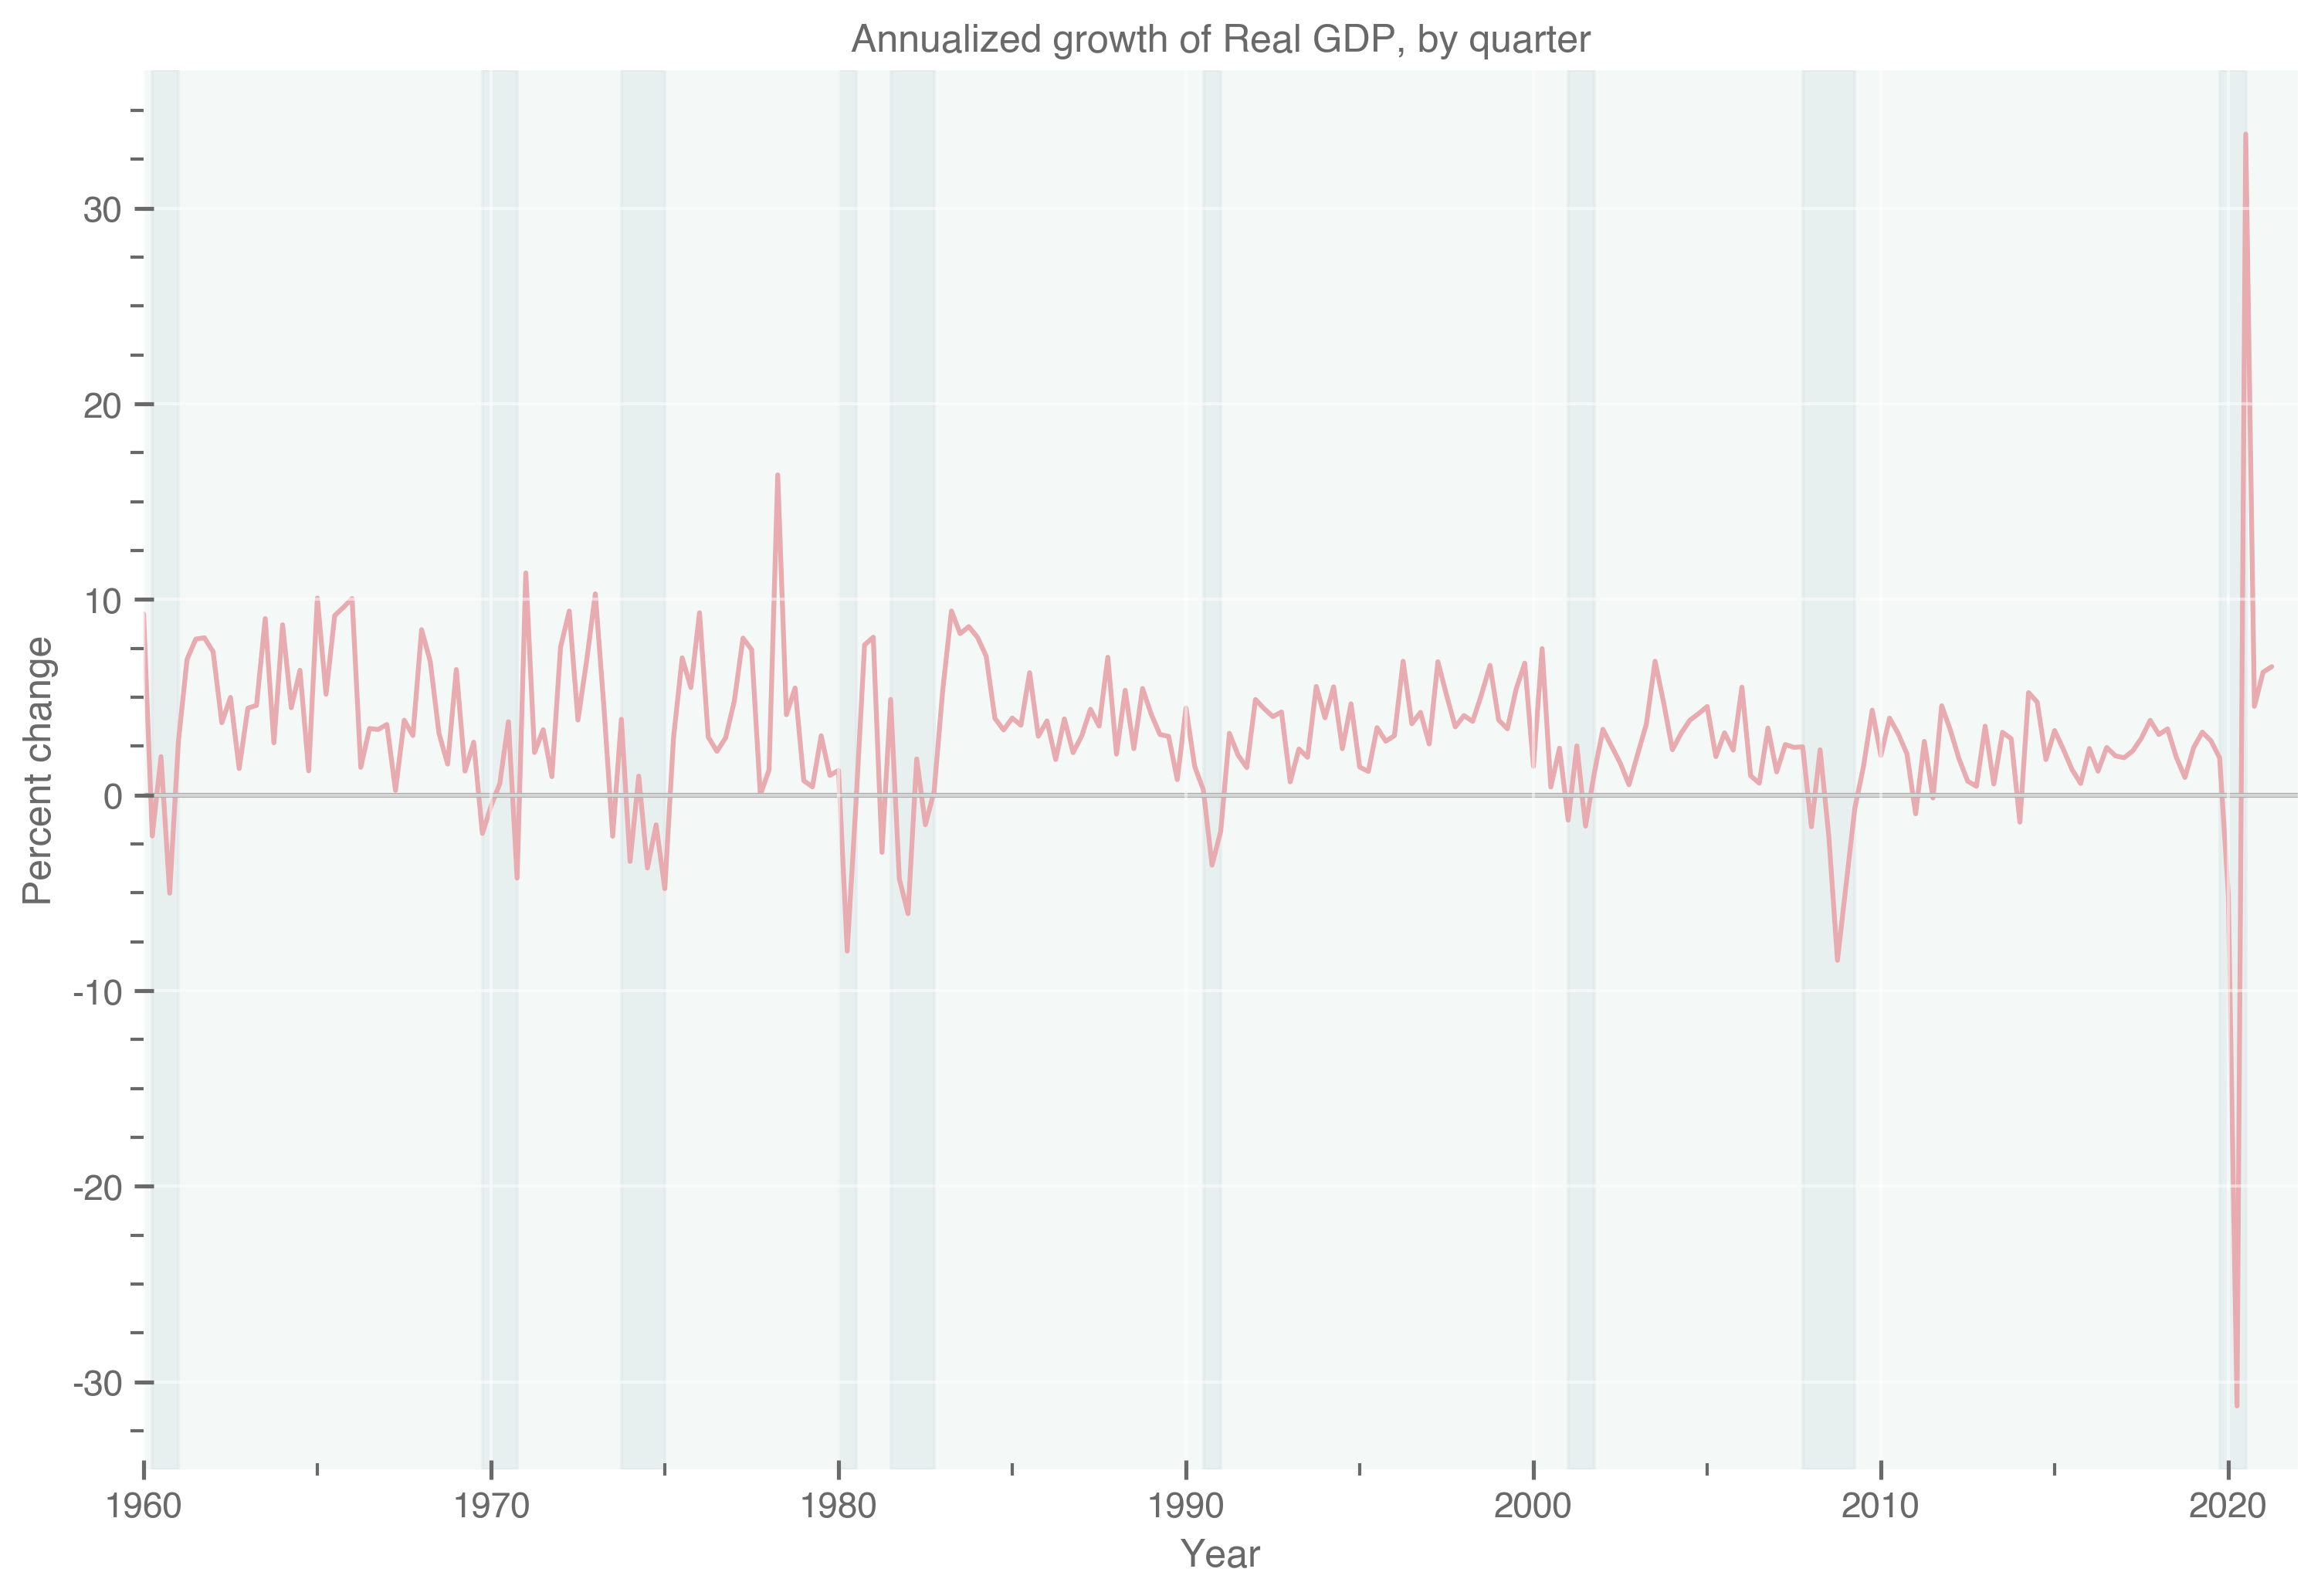

In [628]:
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
ax.patch.set_alpha(.3)
ax.plot(nomgdp['Annualized Rate'], color='#E8ABB0', alpha=1)
#ax.set_color_cycle(['#e3abe8', '#ABE8E3'])
#ax.cycler(color=['#e3abe8', '#ABE8E3'])
#ax2.plot(nomgdp['Real GDP'], color='#ABE8E3', alpha=1)
#ax.axvspan(2019.75, 2020.25, color='#EAE3DD', alpha=0.6)
#ax.axvspan(2019.75, 2020.25, color='#EAE3DD', alpha=0.6)
oof = 0
peaks = [2019.75, 2007.75, 2001.00, 1990.5, 1981.5, 1980.00, 1973.75, 1969.75, 1960.25]
ends = [2020.5, 2009.25, 2001.75, 1991.00, 1982.75, 1980.5, 1975.00, 1970.75, 1961.00]
while oof <= 8:
    ax.axvspan(peaks[oof], ends[oof], color='#DDE7EA', alpha=0.5)
    oof += 1
    pass

#ax.set_xticks(ax.get_xticks()[::10])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.set_xlim(1960, 2022)
ax.axhline(0, color='darkgrey')
#ax.set_ylim(0)
ax.set(title='Annualized growth of Real GDP, by quarter',
ylabel='Percent change',
xlabel='Year')
# twin1 = ax.twinx()
# twin1.plot(realgdp)
#ax.legend(nomgdp.columns.values,loc='upper left', frameon=True)
plt.show()

In [653]:
u36 = pd.read_csv('u36.csv')

In [658]:
u36

,UNRATE,U6RATE
DATE,,
1994-01-01,6.6,11.7
1994-02-01,6.6,11.4
1994-03-01,6.5,11.5
1994-04-01,6.4,11.3
1994-05-01,6.1,10.9
...,...,...
2021-02-01,6.2,11.1
2021-03-01,6.0,10.7
2021-04-01,6.1,10.4


In [657]:
u36 = u36.set_index(pd.DatetimeIndex(u36['DATE'])).drop(columns=['DATE'])

In [670]:
u36 = u36.rename(columns={'UNRATE': 'U3 Unemployment Rate', 'U6RATE':'U6 Unemployment Rate'})


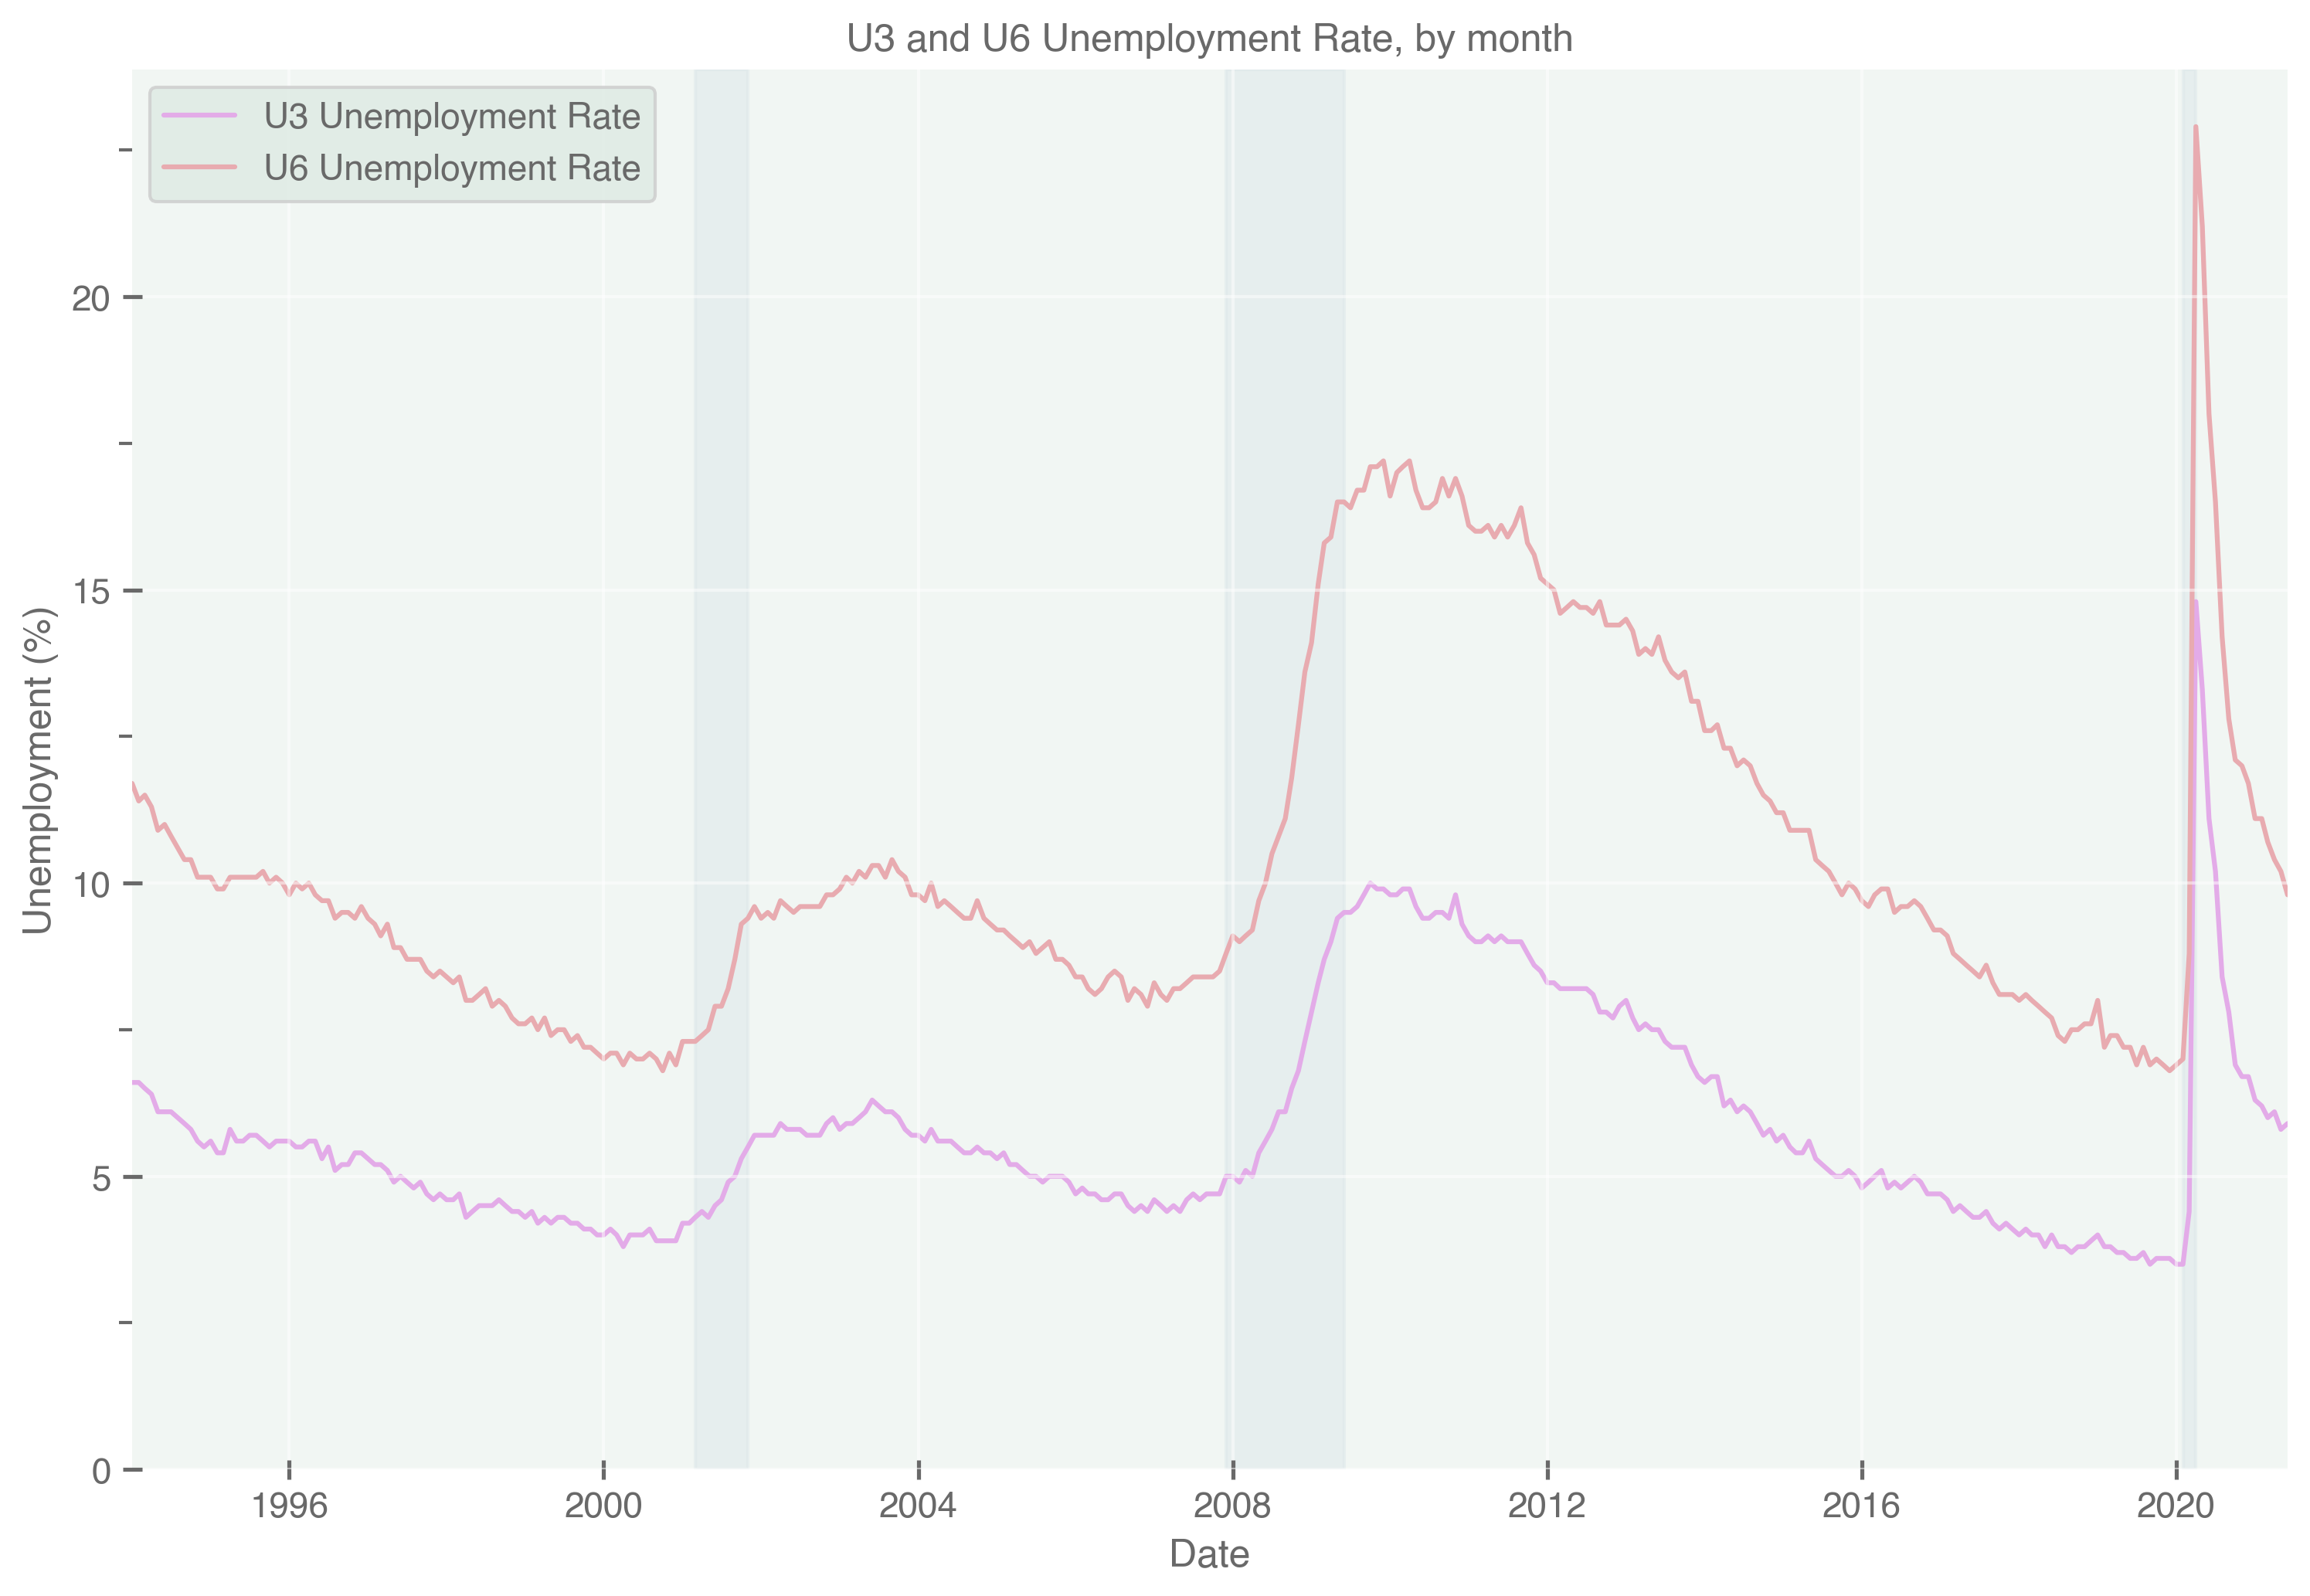

In [679]:
xig, ax = plt.subplots(figsize=(12,8), dpi=300)
import matplotlib.dates as mdates

ax.patch.set_alpha(.4)
ax.plot(u36, alpha=1)
#ax.set_color_cycle(['#e3abe8', '#ABE8E3'])
#ax.cycler(color=['#e3abe8', '#ABE8E3'])
#ax2.plot(nomgdp['Real GDP'], color='#ABE8E3', alpha=1)
#ax.axvspan(2019.75, 2020.25, color='#EAE3DD', alpha=0.6)
#ax.axvspan(2019.75, 2020.25, color='#EAE3DD', alpha=0.6)
oof = 0
#peaks = [2019.75, 2007.75, 2001.00]
#ends = [2020.5, 2009.25, 2001.75]
# while oof <= 8:
#     ax.axvspan(peaks[oof], ends[oof], color='#DDE7EA', alpha=0.5)
#     oof += 1
#     pass
#ax.axvspan((2020, 2, 1), (2020, 4, 1), color='#DDE7EA', alpha=0.5)
ax.axvspan(*mdates.datestr2num(['2/01/2020', '4/01/2020']), color='#DDE7EA', alpha=0.5)
ax.axvspan(*mdates.datestr2num(['12/01/2007', '6/01/2009']), color='#DDE7EA', alpha=0.5)
ax.axvspan(*mdates.datestr2num(['3/01/2001', '11/01/2001']), color='#DDE7EA', alpha=0.5)

#ax.set_xticks(ax.get_xticks()[::10])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_major_formatter('{x:.0f}')
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
ax.set_xlim(*mdates.datestr2num(['1/01/1994', '6/01/2021']))
#ax.axhline(0, color='darkgrey')
ax.set_ylim(0)
ax.set(title='U3 and U6 Unemployment Rate, by month',
ylabel='Unemployment (%)',
xlabel='Date')
# twin1 = ax.twinx()
# twin1.plot(realgdp)
ax.legend(u36.columns.values,loc='upper left', frameon=True)
plt.show()